# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils 
from keras.layers import Input, Concatenate
from keras.models import Model

Using TensorFlow backend.


2019-10-18 01:31:18.937149


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-10-18 01:31:18.957678


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-10-18 01:31:19.287781


(60000, 28, 28)
2019-10-18 01:31:19.321671


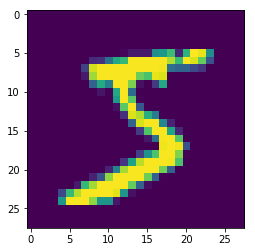

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-10-18 01:31:19.537237


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-10-18 01:31:19.668415


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-10-18 01:31:19.677178


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)

Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-10-18 01:31:19.693862


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-10-18 01:31:19.704189


In [10]:
# Input
X1 = Input(shape=(28, 28, 1))

# First Convolution Layer
X2 = Convolution2D(48, (3, 3), input_shape=(32, 32, 3), padding = 'same')(X1)
X2 = Activation('relu')(X1)

# Concatenate X1 and X2 and apply convolution
X3 = Concatenate(axis=3)([X1, X2])
X3 = Convolution2D(48, (3, 3), padding = 'same')(X3)
X3 = Activation('relu')(X3)

#Concatenate X1, X2 and X3 and apply maxpooling
X4 = Concatenate(axis=3)([X1, X2, X3])
X4 = MaxPooling2D(pool_size=(2, 2))(X4)

#Another convolution
X5 = Convolution2D(48, (3, 3), padding = 'same')(X4)
X5 = Activation('relu')(X5)

# Concatenate X4 and X5 and apply convolution
X6 = Concatenate(axis=3)([X4, X5])
X6 = Convolution2D(48, (3, 3), padding = 'same')(X6)
X6 = Activation('relu')(X6)

# Concatenate X4, X5 and X6 and apply convolution
X7 = Concatenate(axis=3)([X4, X5, X6])
X7 = Convolution2D(48, (3, 3), padding = 'same')(X7)
X7 = Activation('relu')(X7)

#Concatenate X5, X6 and X7 and apply maxpooling
X8 = Concatenate(axis=3)([X5, X6, X7])
X8 = MaxPooling2D(pool_size=(2, 2))(X8)

#Another convolution
X9 = Convolution2D(48, (3, 3), padding = 'same')(X8)
X9 = Activation('relu')(X9)

# Concatenate X8 and X9 and apply convolution
X10 = Concatenate(axis=3)([X8, X9])
X10 = Convolution2D(48, (3, 3), padding = 'same')(X10)
X10 = Activation('relu')(X10)

# Concatenate X8, X9 and X10 and apply convolution
X11 = Concatenate(axis=3)([X8, X9, X10])
X11 = Convolution2D(48, (3, 3), padding = 'same')(X11)
X11 = Activation('relu')(X11)

#Apply big Kernel for the softmax operation
X12 = Convolution2D(10, 1)(X11)
X12 = Convolution2D(10, 7)(X12)
X12 = Flatten()(X12)
X13 = Activation('softmax')(X12)

model = Model(X1, X13, name='model-1')


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:
model.summary()

print(datetime.datetime.now())

Model: "model-1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 2)    0           input_1[0][0]                    
                                                                 activation_1[0][0]               
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 48)   912         concatenate_1[0][0]        

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-10-18 01:31:20.078126


In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Epoch 1/10





60000/60000 [==============================] - 44s 730us/step - loss: 0.1078 - acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0405 - acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.0287 - acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0219 - acc: 0.9932
Epoch 5/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0179 - acc: 0.9943
Epoch 6/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0163 - acc: 0.9951
Epoch 7/10
60000/60000 [==============================] - 41s 692us/step - loss: 0.0140 - acc: 0.9956
Epoch 8/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0109 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0109 - acc: 0.9967
Epoch 10/10
60000/60000 [==============================] - 42s 694us/step 

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-10-18 01:38:20.612501


In [15]:
print(score)
print(datetime.datetime.now())

[0.03171768120545121, 0.9917]
2019-10-18 01:38:20.623974
